part a

In [55]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
!pip install PrettyTable
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#load the data
df = pd.read_csv('Breast_cancer_data.csv')
# a few top lines
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [41]:
#using library and slplint data
fet = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area","mean_smoothness"]
target = "diagnosis"
fet_train, fet_test, target_train, target_test = train_test_split(df[fet],df[target],test_size = 0.2)

In [42]:
#model fitting
m = GaussianNB()
m.fit(fet_train, target_train)

GaussianNB()

In [46]:
#result
res = m.predict(fet_test)


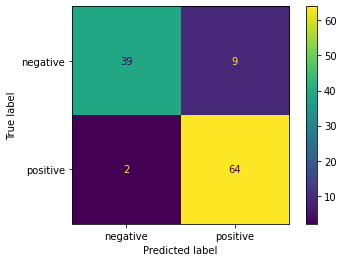

In [51]:
#confusion_matrix
cm = metrics.confusion_matrix(target_test, res)
cm_d = metrics.ConfusionMatrixDisplay(cm,display_labels=['negative', 'positive'])
cm_d.plot()
plt.show()

In [52]:
precision, recall, fscore, support = score(target_test,res)

chart = PrettyTable(['Label', 'Precision', 'Recall'])
chart.add_row(['negative', round(precision[0]*100, 2), round(recall[0]*100, 2)])
chart.add_row(['positive', round(precision[1]*100, 2), round(recall[1]*100, 2)])
print(chart)

+----------+-----------+--------+
|  Label   | Precision | Recall |
+----------+-----------+--------+
| negative |   95.12   | 81.25  |
| positive |   87.67   | 96.97  |
+----------+-----------+--------+


In [56]:
acc = accuracy_score(target_test,res)
acc

0.9035087719298246